In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

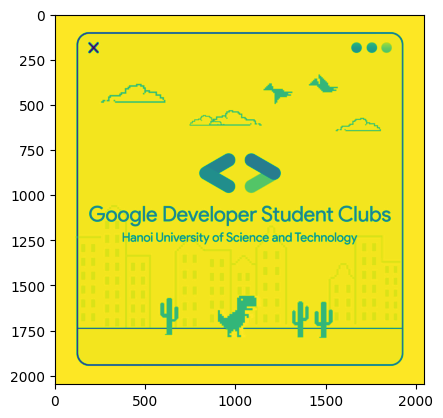

In [40]:
img = cv2.imread('gdsc.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)


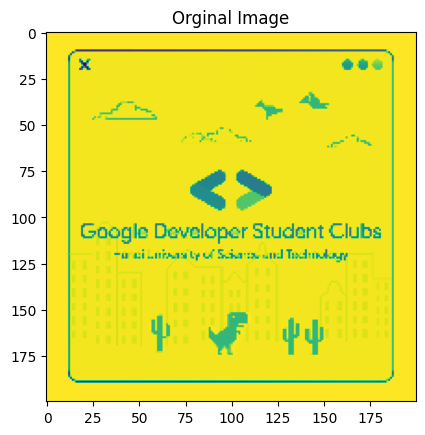

In [41]:
img = cv2.resize(img_gray, (200,200))
plt.title('Orginal Image')
plt.imshow(img)

In [42]:
def visualize_compress_image(image):
    U, S, V = np.linalg.svd(image, full_matrices = False)
     # Chuẩn hóa ma trận U về khoảng [0, 1]
    S_matrix = np.zeros((U.shape[0], V.shape[0]))  # Tạo ma trận 0 với kích thước tương ứng
    np.fill_diagonal(S_matrix, S)  # Điền các giá trị S vào đường chéo
    S_rescaled = (S_matrix - np.min(S_matrix)) / (np.max(S_matrix) - np.min(S_matrix))
    
    U_rescaled = (U - np.min(U)) / (np.max(U) - np.min(U))
    V_rescaled = (V - np.min(V)) / (np.max(V) - np.min(V))
    matrices = [U_rescaled, S_rescaled, V_rescaled]
    titles = ["U", "S", "V"]
    fig = plt.figure(figsize = (10,10))
    for i in range(len(matrices)):
        plt.subplot(1,3,i+1)
        plt.imshow(matrices[i], cmap='gray')
        plt.title(titles[i])
    plt.show()
    

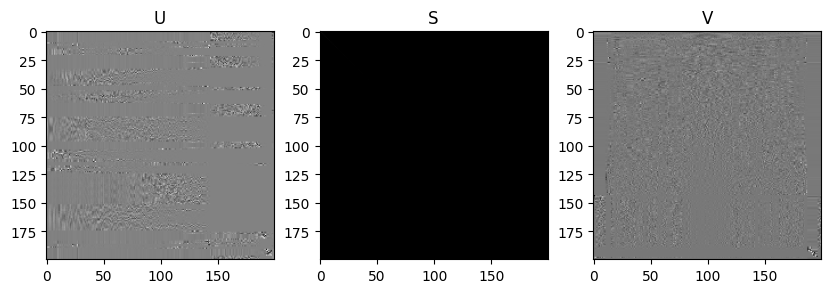

In [43]:
visualize_compress_image(img)

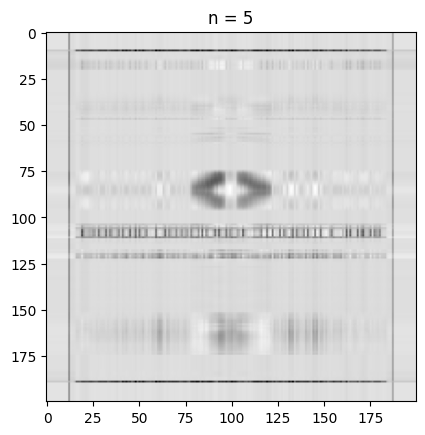

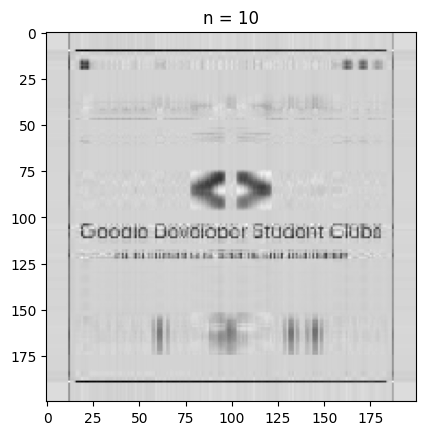

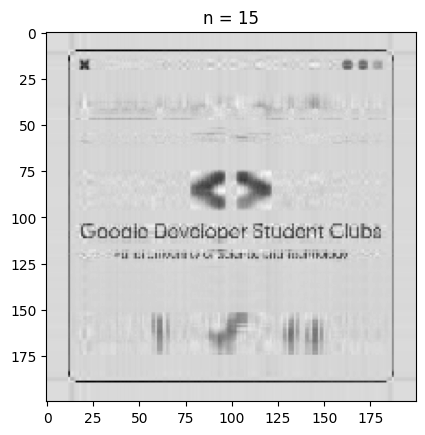

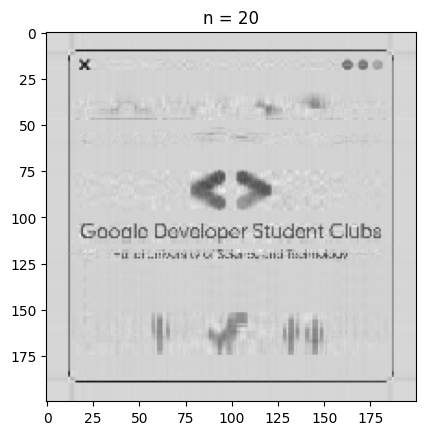

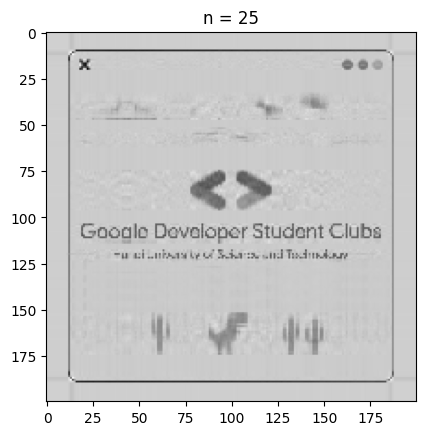

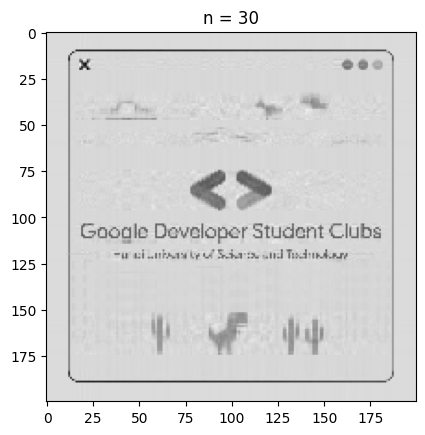

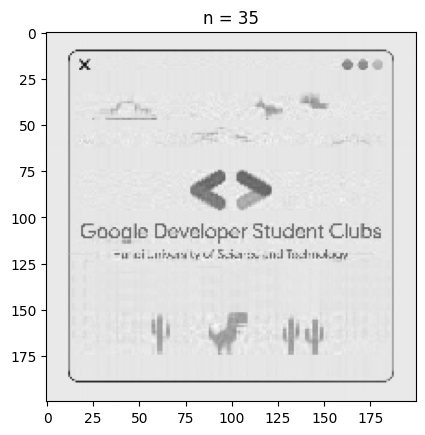

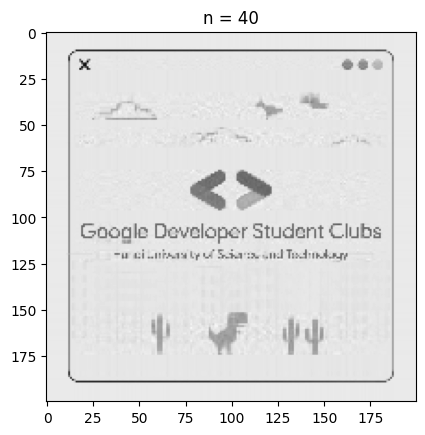

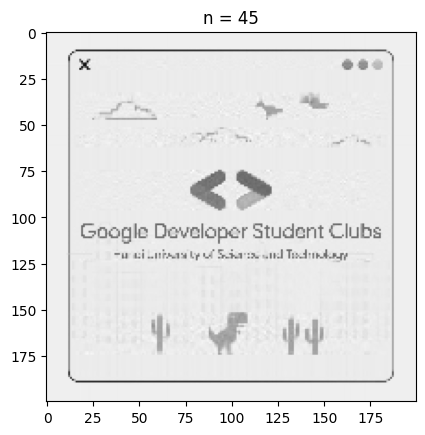

In [45]:
def show_compress_image(img_name):
  for i in range(5, 50, 5):
    U, S, V = np.linalg.svd(img, full_matrices=False)
    recon_img = np.matrix(U[:,:i]) * np.diag(S[:i]) * np.matrix(V[:i,:])
    plt.imshow(recon_img, cmap="gray")
    title = "n = %s" %i 
    plt.title(title)
    plt.show()
show_compress_image(img)